<a href="https://colab.research.google.com/github/someshsb1/cs666student/blob/main/Som_CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

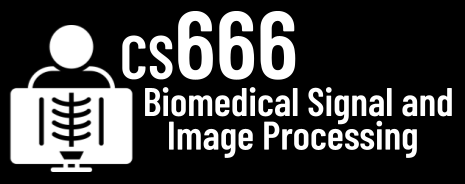
#Assignment 5

In [1]:
# NAME: Somesh Balani

In [2]:
# In this assignment, we will visualize and explore a CT scan!

In [3]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# we are using pydicom, so lets install it!
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.2 MB/s eta 0:00:00


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [5]:
# Use wget to download https://cs666.org/data/ct.zip !
# This is a CT scan of an arm in DICOM format.

In [6]:
!wget https://cs666.org/data/ct.zip

--2024-04-12 03:20:13--  https://cs666.org/data/ct.zip
Resolving cs666.org (cs666.org)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to cs666.org (cs666.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5847706 (5.6M) [application/zip]
Saving to: ‘ct.zip’

ct.zip              100%[===================>]   5.58M  --.-KB/s    in 0.05s   

2024-04-12 03:20:13 (119 MB/s) - ‘ct.zip’ saved [5847706/5847706]



In [7]:
# Then use the following snippet to extract the data.

In [8]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [9]:
# 1) Let's explore the data using the Files panel on the left.
# TODO: How many slices are there?

In [10]:
import os
import glob

image_files = glob.glob(os.path.join('ct', '*.dcm'))

print("Number of images in the folder:", len(image_files))

Number of images in the folder: 220


In [11]:
# 2) Let's visualize the data with SliceDrop!
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [12]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

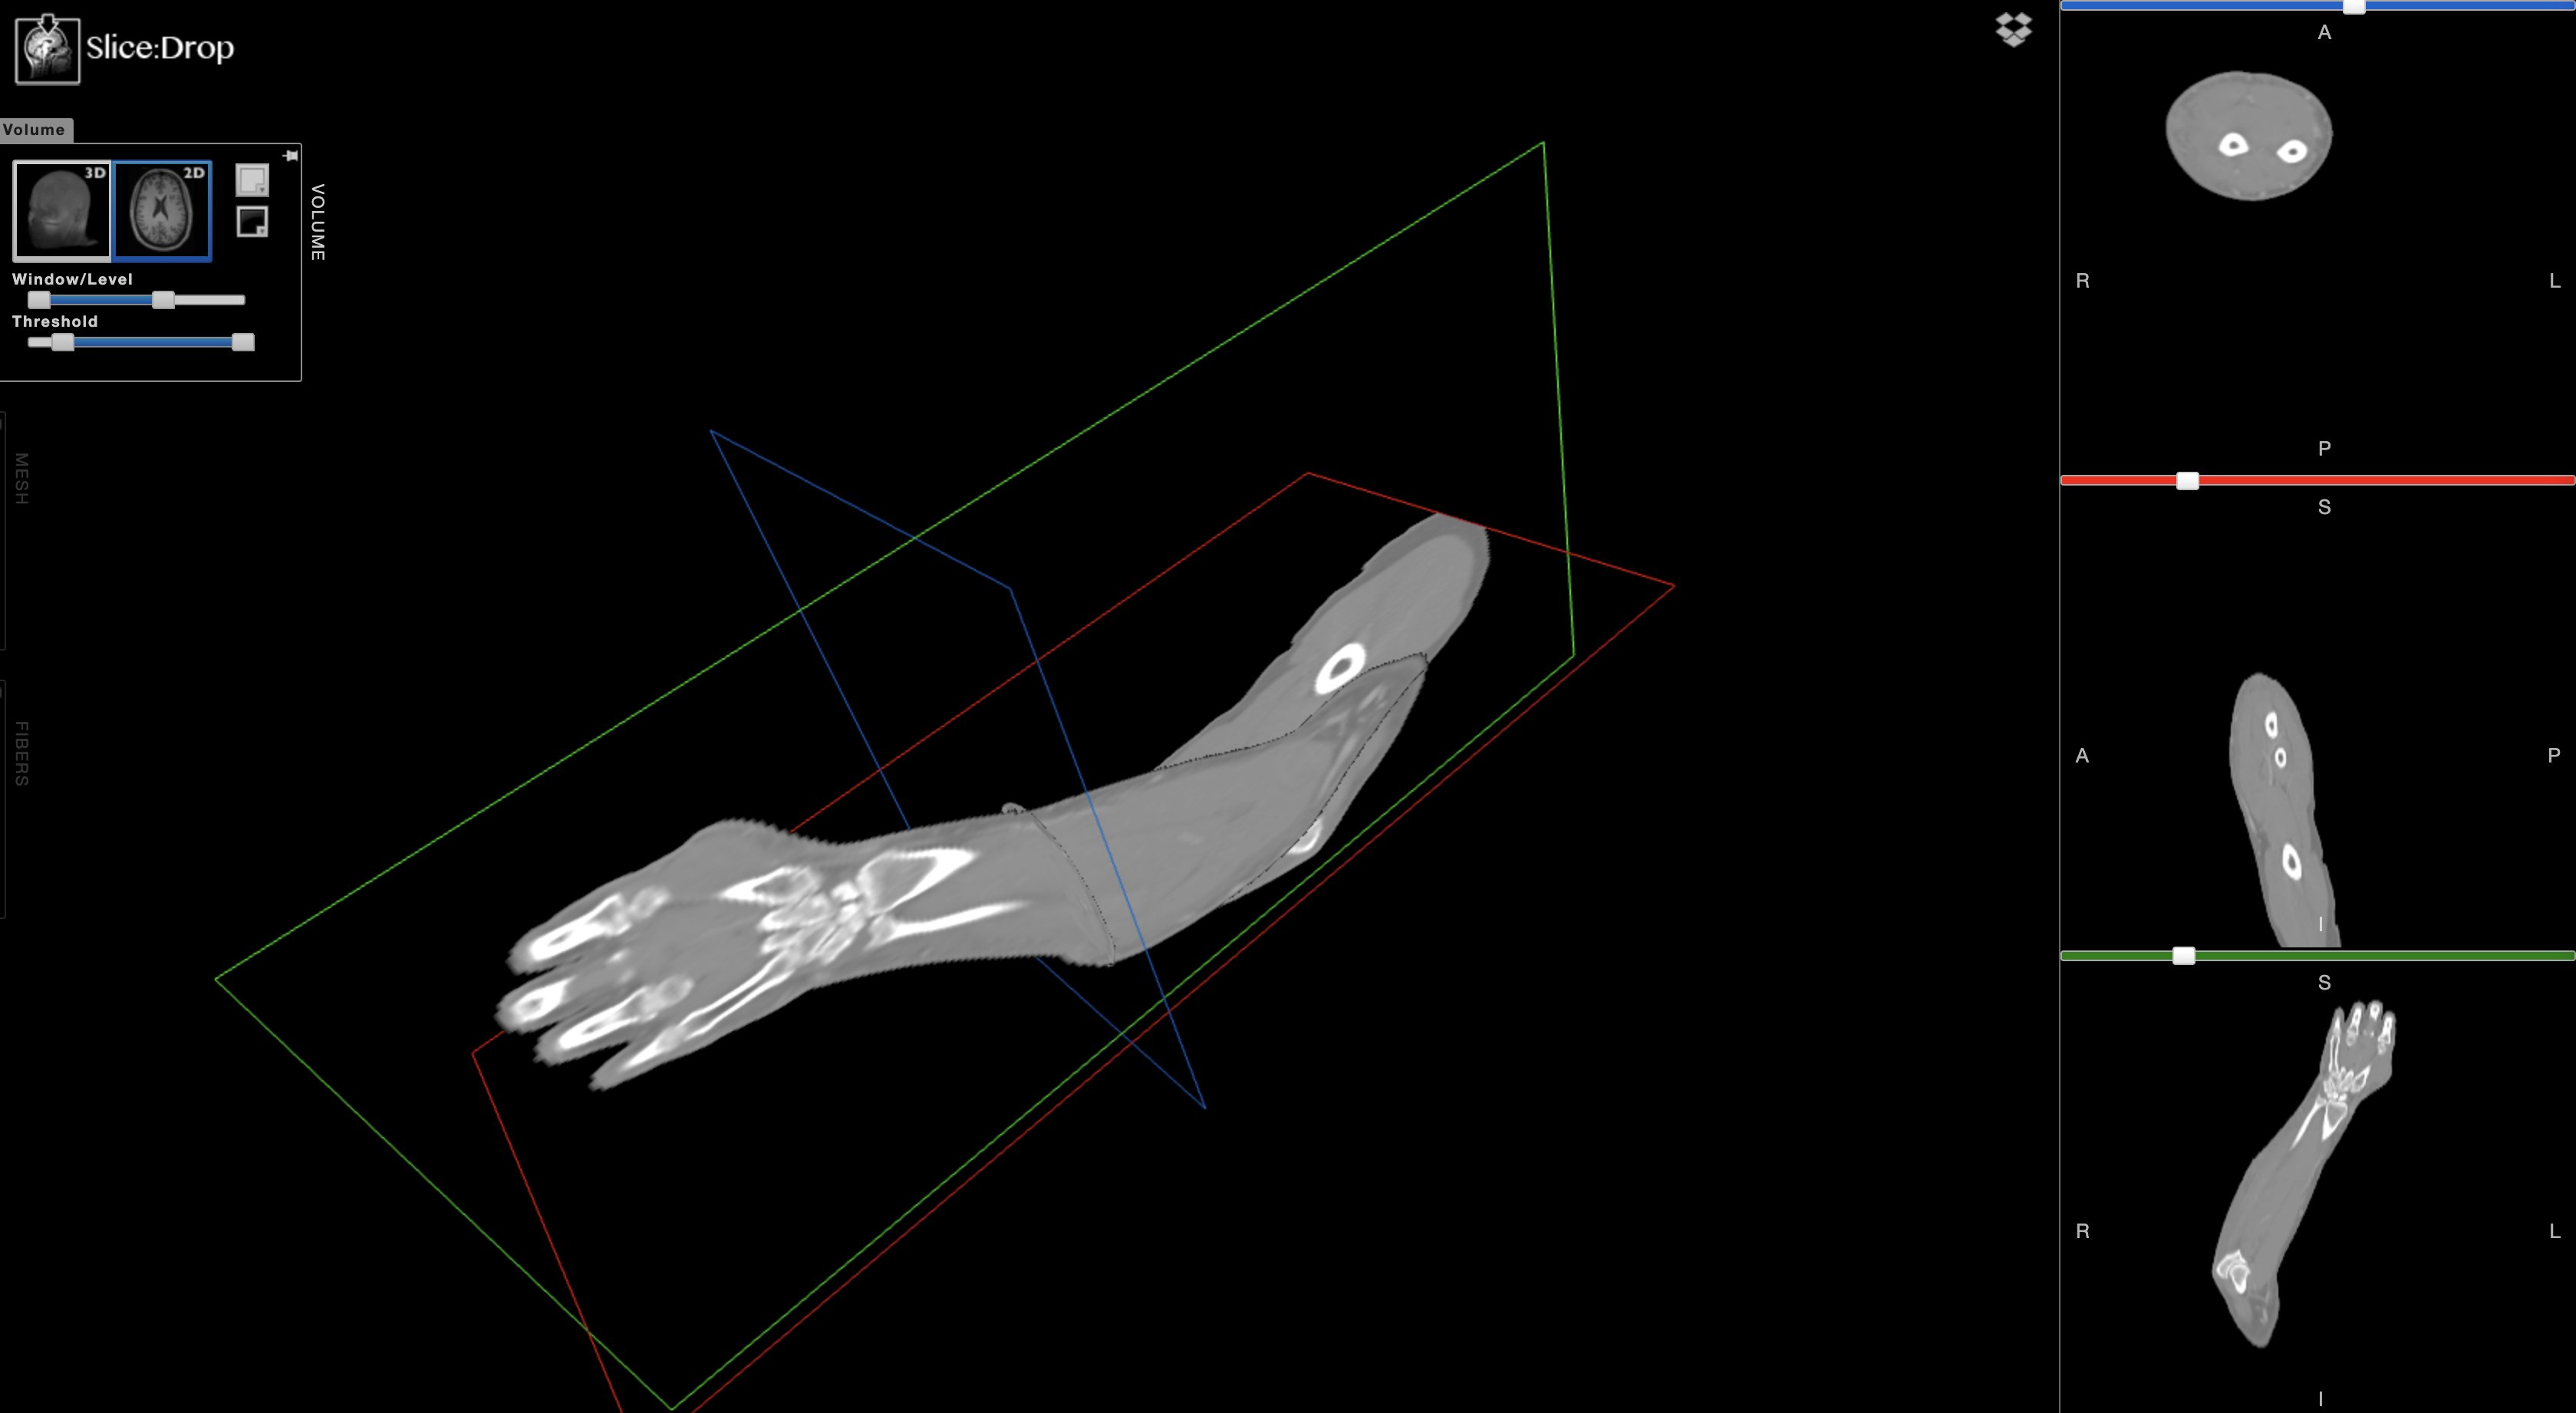

In [13]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [14]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click.

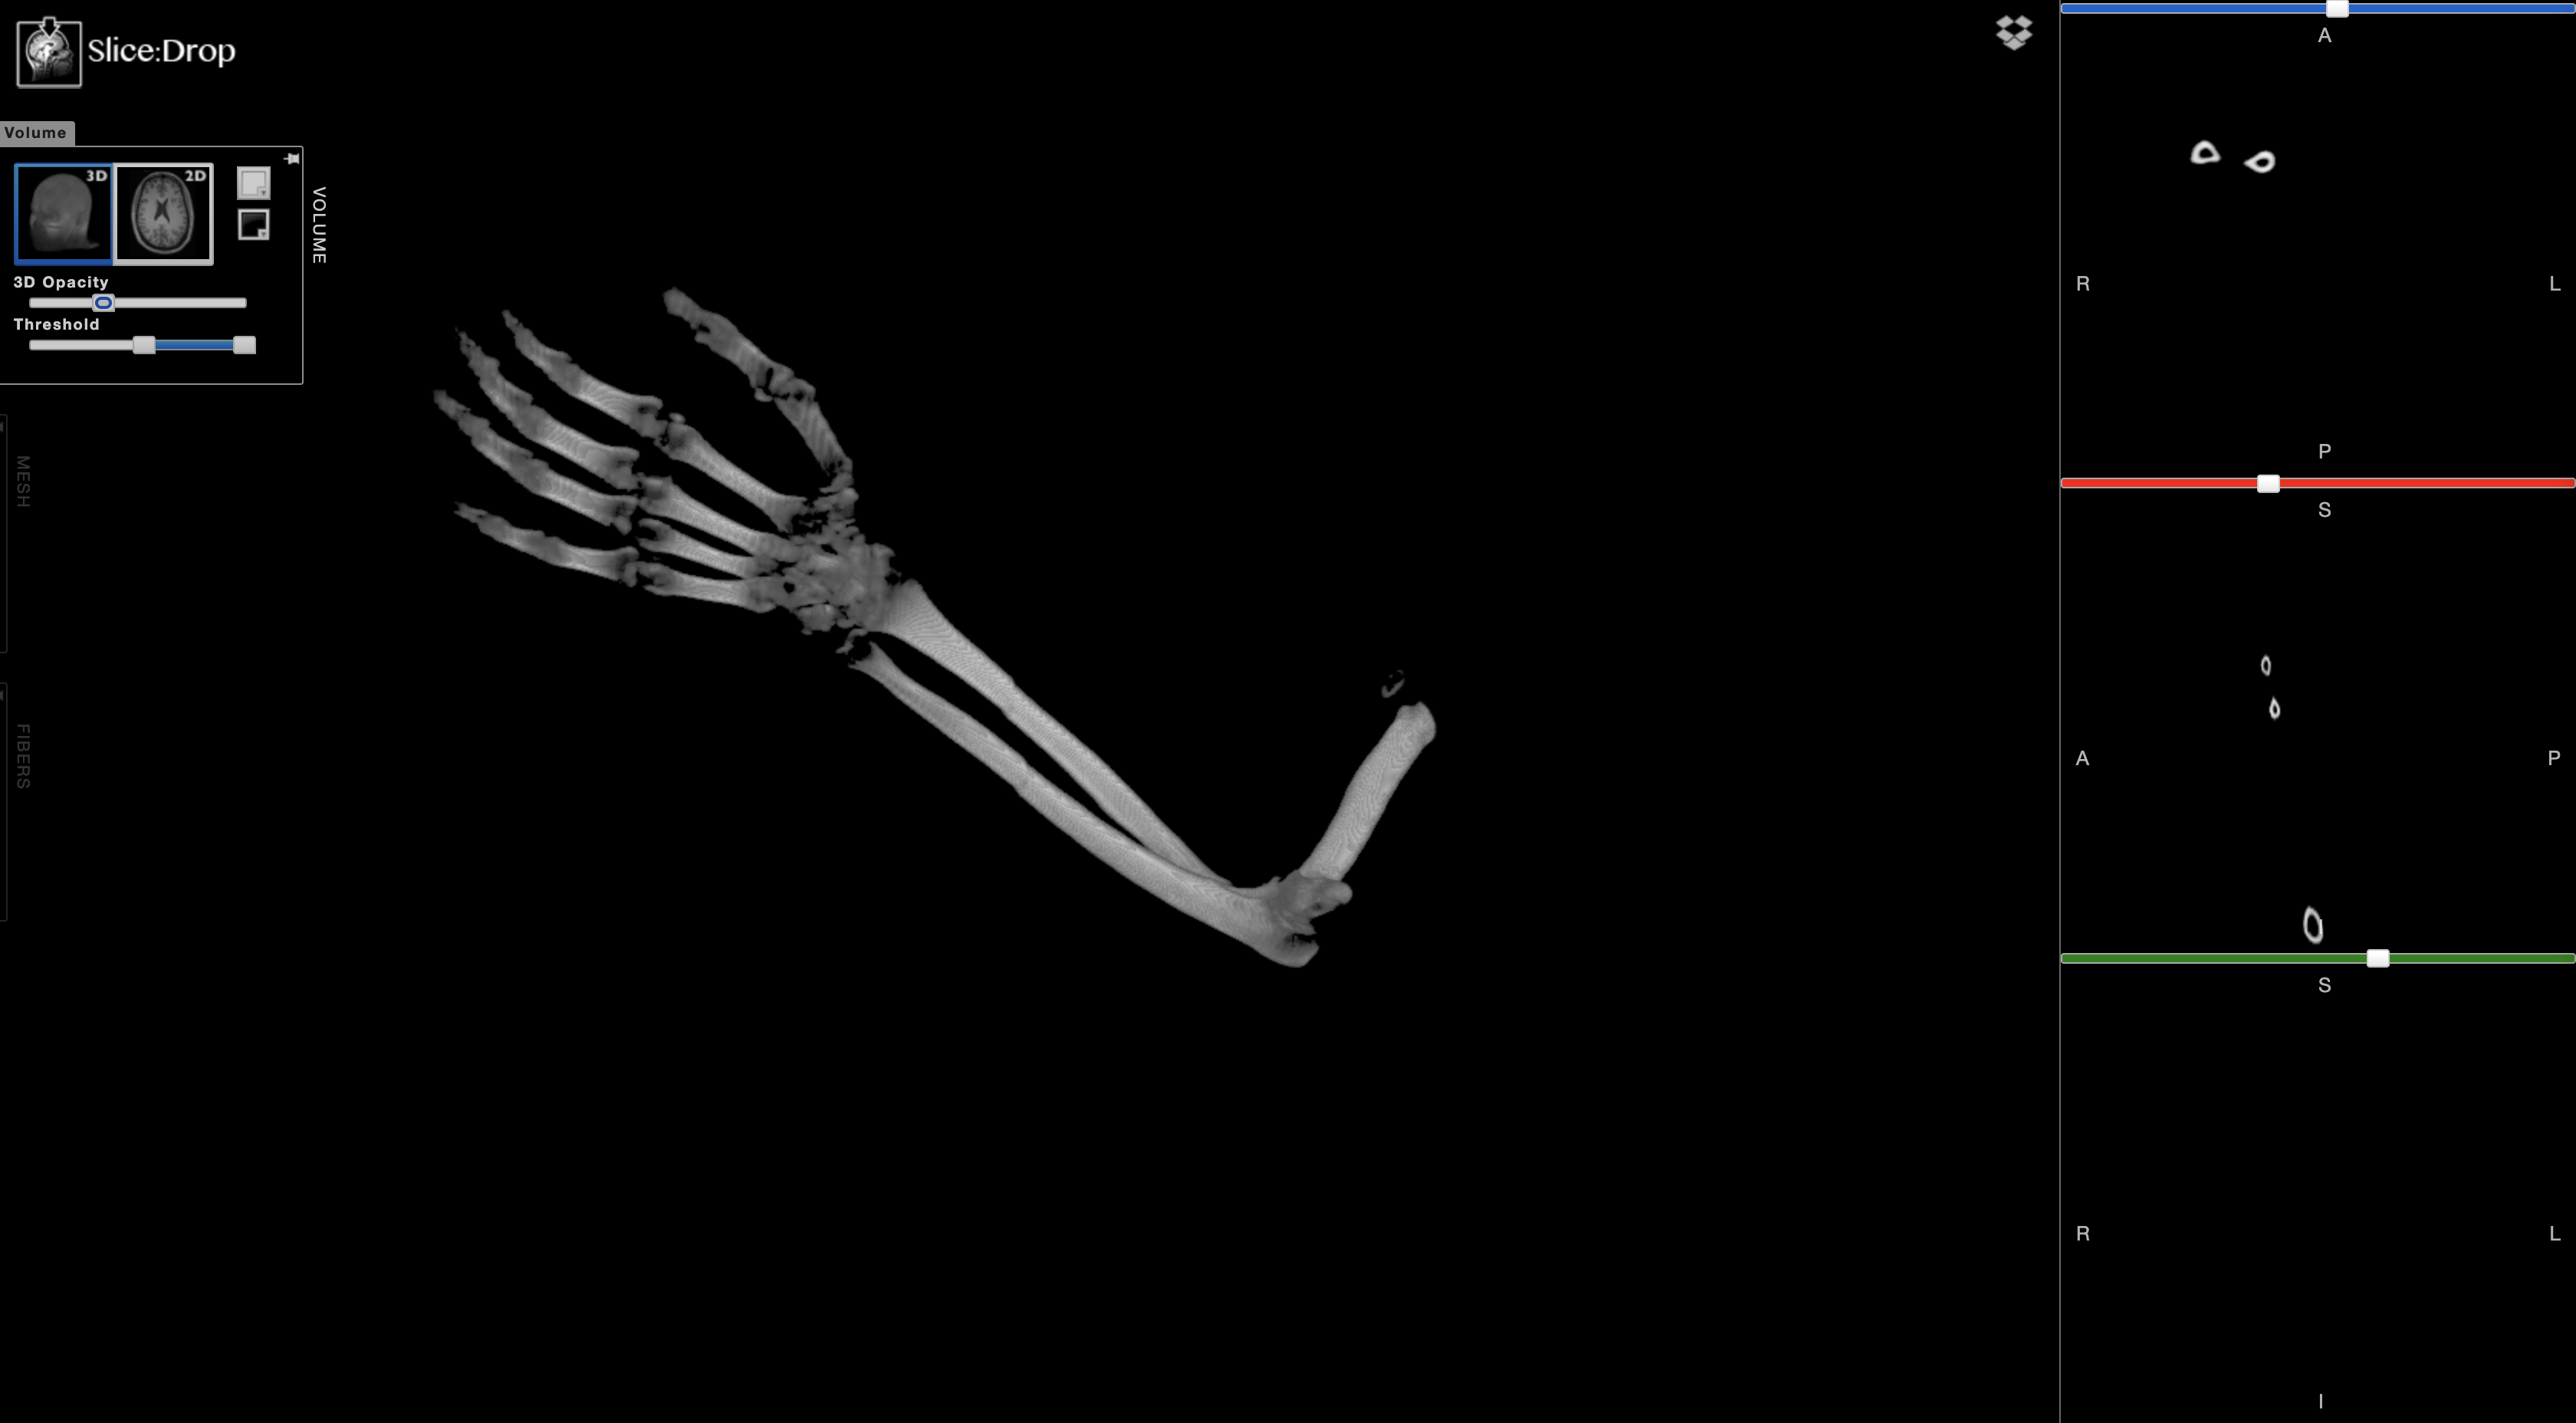

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [15]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [16]:
from pydicom import dcmread

In [39]:
from os import listdir
from os.path import join
import os
import numpy as np
import pydicom as dcm

# Define the directory containing DICOM files
DATA_DIR = "."

# List all files in the directory
file_list = os.listdir(DATA_DIR)

# Filter only DICOM files
for filename in file_list[:]:  # Using a copy of the list to avoid modifying it during iteration
    if not filename.endswith(".dcm"):
        file_list.remove(filename)

# Sort the DICOM file names
file_list.sort()

# List DICOM images in the "ct" directory
ct_images = listdir("ct")
ct_images.sort()

# Read DICOM slices and store them in a list
dicom_slices = [dcm.dcmread(join("ct", image)) for image in ct_images]

# Convert DICOM slices to NumPy arrays and store them in a 3D NumPy array
image_data = np.array([slice.pixel_array for slice in dicom_slices])

# Print the shape of the resulting 3D NumPy array
print("Shape of DICOM array:", image_data.shape)


Shape of DICOM array: (220, 454, 512)


In [18]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

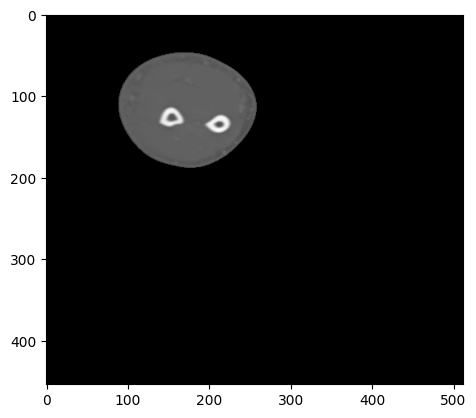

In [40]:
# TODO: YOUR CODE FOR AXIAL

plt.imshow(dicom_array[:,:,100], cmap='gray')

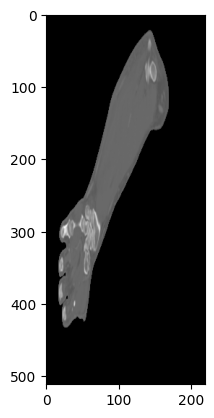

In [41]:
# TODO: YOUR CODE FOR SAGITTAL
plt.imshow(dicom_array[100], cmap='gray')

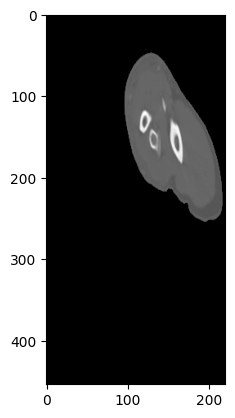

In [42]:
# TODO: YOUR CODE FOR CORONAL
plt.imshow(dicom_array[:,100,:], cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [22]:
# We will now enhance the visualization from above by performing
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [23]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

Window center: 30
Window width: 410
Rescale intercept: -1024


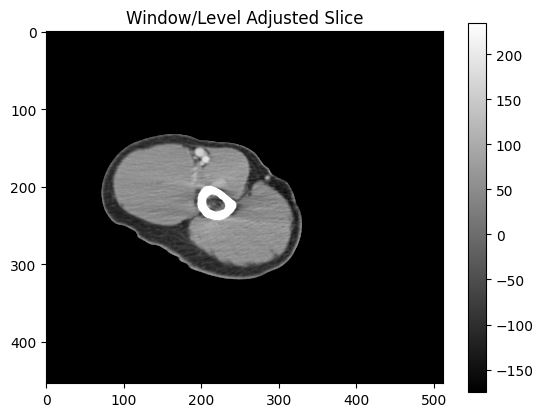

In [45]:
# TODO: YOUR CODE
# Extracting Window/Level values from the DICOM slice
window_center = dicom_slices[200].WindowCenter
window_width = dicom_slices[200].WindowWidth
rescale_intercept = dicom_slices[200].RescaleIntercept

# Printing the extracted values
print("Window center:", window_center)
print("Window width:", window_width)
print("Rescale intercept:", rescale_intercept)

# Calculating the minimum and maximum values for visualization
vmin = window_center - window_width / 2
vmax = window_center + window_width / 2

# Performing window/level adjustment and visualization
adjusted_slice = dicom_slices[200].pixel_array.astype(np.float32) + rescale_intercept
plt.imshow(adjusted_slice, cmap='gray', vmin=vmin, vmax=vmax)
plt.title("Window/Level Adjusted Slice")
plt.colorbar()
plt.show()

In [26]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

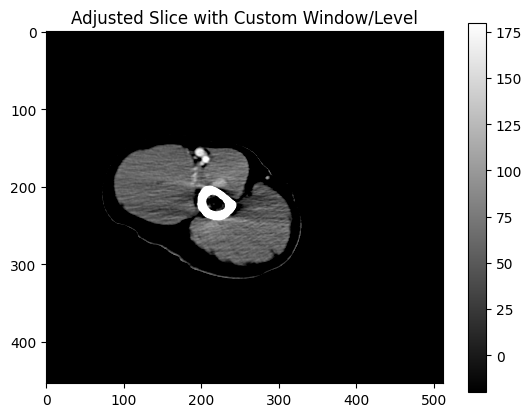

In [63]:
# TODO: YOUR CODE
new_window_center = 80
new_window_width = 200

# Calculating the minimum and maximum values for visualization
vmin = new_window_center - new_window_width / 2
vmax = new_window_center + new_window_width / 2

# Performing window/level adjustment and visualization
adjusted_slice = dicom_slices[200].pixel_array.astype(np.float32) * dicom_slices[200].RescaleSlope + rescale_intercept
plt.imshow(adjusted_slice, cmap='gray', vmin=vmin, vmax=vmax)
plt.title("Adjusted Slice with Custom Window/Level")
plt.colorbar()
plt.show()

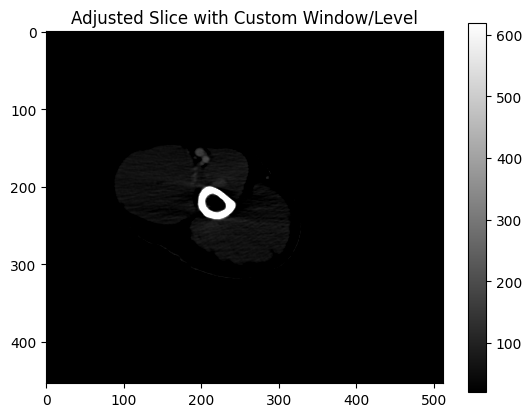

In [68]:
new_window_center = 320
new_window_width = 600

# Calculating the minimum and maximum values for visualization
vmin = new_window_center - new_window_width / 2
vmax = new_window_center + new_window_width / 2

# Performing window/level adjustment and visualization
adjusted_slice = dicom_slices[200].pixel_array.astype(np.float32) * dicom_slices[200].RescaleSlope + rescale_intercept
plt.imshow(adjusted_slice, cmap='gray', vmin=vmin, vmax=vmax)
plt.title("Adjusted Slice with Custom Window/Level")
plt.colorbar()
plt.show()

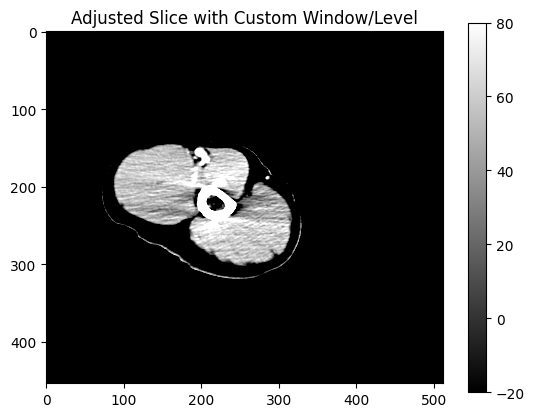

In [71]:
new_window_center = 30
new_window_width = 100

# Calculating the minimum and maximum values for visualization
vmin = new_window_center - new_window_width / 2
vmax = new_window_center + new_window_width / 2

# Performing window/level adjustment and visualization
adjusted_slice = dicom_slices[200].pixel_array.astype(np.float32) * dicom_slices[200].RescaleSlope + rescale_intercept
plt.imshow(adjusted_slice, cmap='gray', vmin=vmin, vmax=vmax)
plt.title("Adjusted Slice with Custom Window/Level")
plt.colorbar()
plt.show()

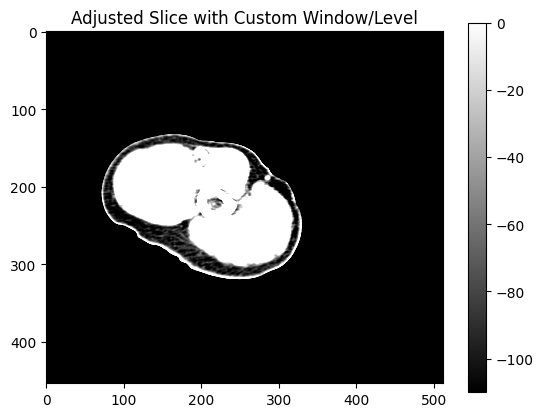

In [110]:
new_window_center = -50
new_window_width = -100

# Calculating the minimum and maximum values for visualization
vmin = new_window_center - new_window_width / 2
vmax = new_window_center + new_window_width / 2

# Performing window/level adjustment and visualization
adjusted_slice = dicom_slices[200].pixel_array.astype(np.float32) * dicom_slices[200].RescaleSlope + rescale_intercept
plt.imshow(adjusted_slice, cmap='gray', vmin=vmin, vmax=vmax)
plt.title("Adjusted Slice with Custom Window/Level")
plt.colorbar()
plt.show()

In [28]:
# Which values make sense and why?

In [29]:
# TODO: YOUR ANSWER

## I think the values 320, 600 brings out the center/bone visual really well and 80, 200 pops out the edges really well of the slice.
## Its hard to say what makes sense since it really depends on what we're trying to visualize and with what emphasis, if we are looking at the bone structure
## then higher values for window/level makes sense and if we are looking at the muscles/soft_tissues and lower window/level values makes more sense.
## And if we are looking at fat, then negative window/level values will show fat visuals better.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [30]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

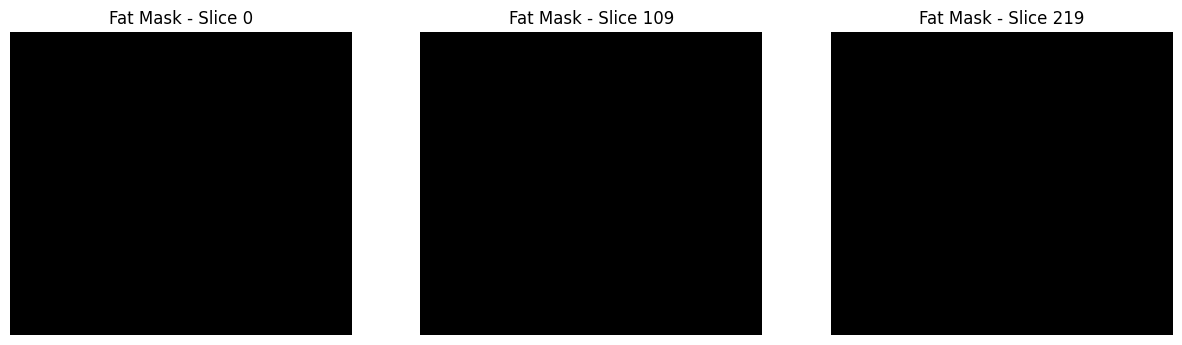

In [126]:
# TODO: YOUR CODE TO SEGMENT FAT

# Define the HU ranges for fat, soft tissue, and bones
fat_range = (-190, -30)

# Create segmentation masks
fat_mask = image_data.copy()
fat_mask[(fat_mask < fat_range[0]) | (fat_mask > fat_range[1])] = 0
fat_mask = fat_mask.astype(np.int16)

# Visualize slices for each structure
num_slices = min(image_data.shape[0], 3)  # Visualize at most 3 slices
slice_indices = np.linspace(0, image_data.shape[0] - 1, num_slices, dtype=int)

# Plot slices for fat
plt.figure(figsize=(15, 5))
for i, slice_index in enumerate(slice_indices):
    plt.subplot(1, num_slices, i + 1)
    plt.imshow(fat_mask[slice_index], cmap='gray')
    plt.title(f"Fat Mask - Slice {slice_index}")
    plt.axis('off')
plt.show()


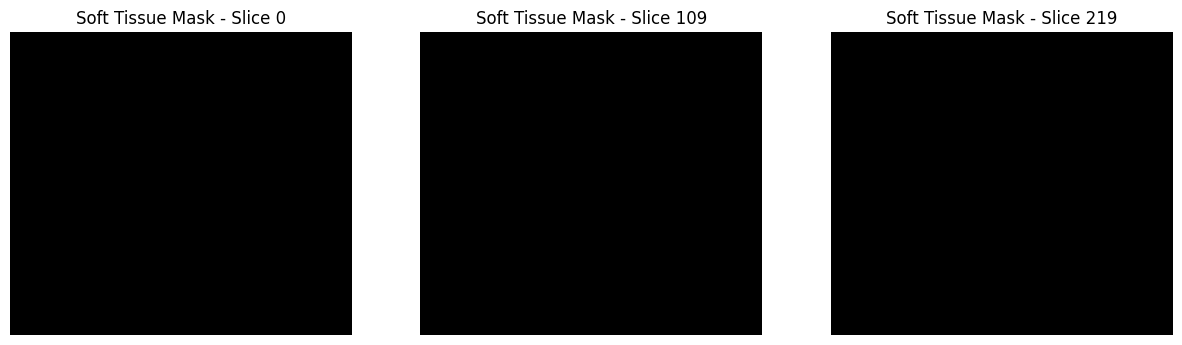

In [129]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
soft_tissue_range = (30, 100)

soft_tissue_mask = image_data.copy()
soft_tissue_mask[(soft_tissue_mask < soft_tissue_range[0]) | (soft_tissue_mask > soft_tissue_range[1])] = 0
soft_tissue_mask = soft_tissue_mask.astype(np.int16)

# Plot slices for soft tissue
plt.figure(figsize=(15, 5))
for i, slice_index in enumerate(slice_indices):
    plt.subplot(1, num_slices, i + 1)
    plt.imshow(soft_tissue_mask[slice_index], cmap='gray')
    plt.title(f"Soft Tissue Mask - Slice {slice_index}")
    plt.axis('off')
plt.show()

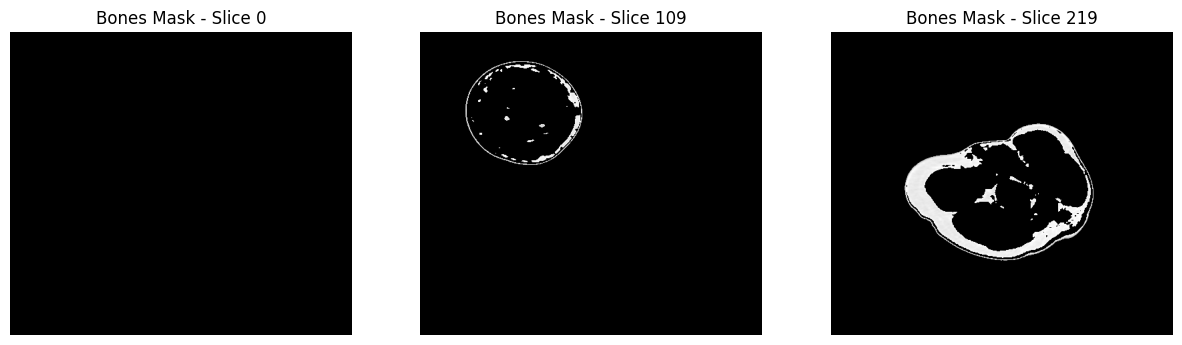

In [128]:
# TODO: YOUR CODE TO SEGMENT BONES
bones_range = (100, 1000)

bones_mask = image_data.copy()
bones_mask[(bones_mask < bones_range[0]) | (bones_mask > bones_range[1])] = 0
bones_mask = bones_mask.astype(np.int16)

# Plot slices for bones
plt.figure(figsize=(15, 5))
for i, slice_index in enumerate(slice_indices):
    plt.subplot(1, num_slices, i + 1)
    plt.imshow(bones_mask[slice_index], cmap='gray')
    plt.title(f"Bones Mask - Slice {slice_index}")
    plt.axis('off')
plt.show()

In [34]:
# Are the segmentations good?

In [35]:
# TODO: Not good, only the bones mask seem to work slightly okay with visualizing the structure, however, fat/soft_tissue do not work well.

In [36]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""